# Basic Setup

Set up Basic Parameter here

In [1]:
import numpy as np
import random
from mv_laplace import MvLaplaceSampler
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Define sample size
N = 200 # number of subjects
N_T = 100 # number of treated subjects

# Define betas
beta_11 = 1
beta_12 = 1
beta_21 = 1
beta_22 = 1
beta_23 = 1
beta_31 = 1

#Mask rate - (30%-50%)
lambda1 = 100
lambda2 = 25
lambda3 = 12


# Simulate X
The observed covariates for the $n$-th subject $(X_{n1}, X_{n2}, X_{n3}, X_{n4}, X_{n5})$ are i.i.d. generated through the following process: 


$    (X_{n1}, X_{n2})\sim \mathcal{N}\left[\left(\begin{array}{c}
\frac{1}{2}\\
-\frac{1}{3}
\end{array}\right),\left(\begin{array}{cc}
1 & \frac{1}{2} \\
\frac{1}{2} & 1 
\end{array}\right)\right], (X_{n3}, X_{n4})\sim \text{Laplace}\left[\left(\begin{array}{c}
0\\
\frac{1}{\sqrt{3}}
\end{array}\right),\left(\begin{array}{cc}
1 & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & 1 
\end{array}\right)\right],
$
$X_{n5} \sim \text{Bernoulli}(1/3)$, for $n=1,\dots, N$



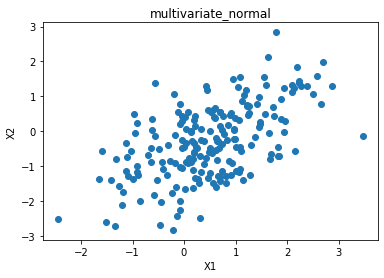

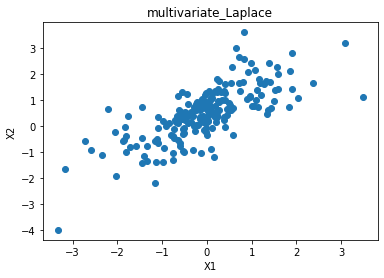

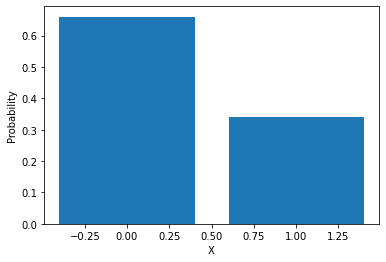

[[-4.35531446e-01 -8.69667774e-01  2.70965393e-01  9.25140754e-01
   0.00000000e+00]
 [ 1.87545611e-01 -6.15821107e-01 -1.80918828e+00 -9.95244630e-01
   0.00000000e+00]
 [-3.80189743e-02 -2.42083737e-01  2.63159511e-01  1.73196083e+00
   0.00000000e+00]
 [-1.65353212e+00 -1.35568648e+00 -1.19187213e-01  1.87380743e-01
   1.00000000e+00]
 [ 6.06053034e-01  3.88476574e-01 -2.02327847e+00 -1.92675785e+00
   0.00000000e+00]
 [ 2.50197985e-01 -4.72201186e-01  1.13337749e+00  7.16451255e-01
   1.00000000e+00]
 [-1.31270478e+00 -7.90868166e-01 -2.20964153e+00  6.32160343e-01
   0.00000000e+00]
 [-3.20296403e-02  4.47090689e-01 -6.87510833e-01  1.67435128e-01
   1.00000000e+00]
 [ 7.62436853e-01  4.27098831e-01 -9.81423548e-01  1.71093557e-01
   0.00000000e+00]
 [-7.02556532e-02 -2.26613601e+00 -1.34044634e+00 -1.33143964e+00
   0.00000000e+00]
 [ 1.82558929e+00 -4.56078442e-01 -5.69324916e-01  4.39898932e-01
   1.00000000e+00]
 [ 9.61137332e-01  7.78287056e-02  1.18190812e-01  1.05516038e+00

In [3]:
# generate Xn1 and Xn2
mean = [1/2, -1/3]
cov = [[1, 1/2], [1/2, 1]]
X1_2 = np.random.multivariate_normal(mean, cov, N)
plt.scatter(X1_2[:, 0], X1_2[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("multivariate_normal")
plt.show()

# generate Xn3 and Xn4
loc = [0, 1/np.sqrt(3)]
cov = [[1,1/np.sqrt(2)], [1/np.sqrt(2),1]]

sampler = MvLaplaceSampler(loc, cov)
X3_4 = sampler.sample(N)
plt.scatter(X3_4[:, 0], X3_4[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("multivariate_Laplace")
plt.show()

# generate Xn5
p = 1/3
X5 = np.random.binomial(1, p, N)

counts = np.unique(X5, return_counts=True)
plt.bar(counts[0], counts[1]/N)
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

# combine all generated variables into a single matrix
X = np.hstack((X1_2, X3_4, X5.reshape(-1,1)))

print(X)

# Simulate U

The unobserved covariates for the $n$-th subject $(U_{n1}, U_{n2})$ are i.i.d. generated through the following process: $U_{n1}\sim N(1/2, 1)$ and $U_{n2}\sim \text{Bernoulli}(2/3)$, for $n=1,\dots, N$.

In [4]:
# generate Un1
mean = 1/2
std = 1
U_n1 = np.random.normal(mean, std, N)

# generate Un2
U_n2 = np.random.binomial(1, 2/3, N)

U = np.concatenate((U_n1.reshape(-1, 1), U_n2.reshape(-1, 1)), axis=1)

U


array([[ 5.47364549e-01,  1.00000000e+00],
       [ 1.35438057e+00,  0.00000000e+00],
       [-6.80056997e-01,  1.00000000e+00],
       [ 3.55176231e-01,  1.00000000e+00],
       [ 1.73819810e+00,  1.00000000e+00],
       [ 6.99246823e-01,  0.00000000e+00],
       [ 9.70386087e-01,  0.00000000e+00],
       [ 7.91999539e-01,  1.00000000e+00],
       [ 2.27047438e+00,  0.00000000e+00],
       [ 2.58073846e-01,  1.00000000e+00],
       [-4.05598820e-02,  1.00000000e+00],
       [ 3.77024059e-01,  1.00000000e+00],
       [ 1.15098045e+00,  1.00000000e+00],
       [ 3.68013747e-01,  1.00000000e+00],
       [-2.26074733e-01,  1.00000000e+00],
       [-5.60566764e-01,  1.00000000e+00],
       [-3.07118936e-01,  0.00000000e+00],
       [-7.52213213e-01,  0.00000000e+00],
       [-1.49552379e+00,  1.00000000e+00],
       [ 8.32492266e-01,  1.00000000e+00],
       [ 2.52554266e-01,  0.00000000e+00],
       [ 6.07051675e-01,  0.00000000e+00],
       [-5.87421192e-02,  0.00000000e+00],
       [ 1.

# Simulate Z
The observed treatment indicators $\mathbf{Z}=(Z_{1}, \dots, Z_{N})\in \{0, 1\}^{N}$ follow a completely randomized experiment: $P(\mathbf{Z}=\mathbf{z})={N\choose N_{T}}^{-1}$ for any $\mathbf{z}=(z_{1},\dots, z_{N})\in \{0,1\}^{N}$ with $\sum_{n=1}^{N}z_{n}=N_{T}$.

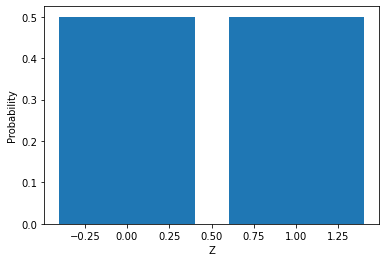

array([0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.])

In [5]:
Z = np.zeros(N)
Z[:N_T] = 1
np.random.shuffle(Z)

counts = np.unique(Z, return_counts=True)
plt.bar(counts[0], counts[1]/N)
plt.xlabel('Z')
plt.ylabel('Probability')
plt.show()
Z = Z.reshape(-1,)
Z

# Simulate Y

The three outcomes of interest $(Y_{n1}, Y_{n2}, Y_{n3})$ are generated via the following process (for $n=1,\dots, N$):

\begin{align*}
    
    &Y_{n1}= \beta_{11} Z_{n}+\beta_{12}Z_{n}\cdot \sum_{p=1}^{5}\sqrt{p}\cdot \exp(X_{np})+\sum_{p=1}^{5}\sum_{p^{\prime}=1}^{5}X_{np} X_{np^{\prime}}^{2}+\sin(U_{n1})+U_{n2},\\
    &Y_{n2}= \beta_{21} Z_{n} + \beta_{22}Z_{n} X_{n1}+ \beta_{23}Z_{n} U_{n1}U_{n2}+\sum_{p=1}^{5}(\cos{p})\cdot X_{np}+\sum_{p=1}^{5}\sum_{p^{\prime}=1}^{5}X_{np}\cdot \exp(X_{np^{\prime}}),  \\
    &Y_{n3}= \beta_{31} Z_{n} + \sum_{p=1}^{5}(\sin{p})\cdot X_{np}+\sum_{p=1}^{5}\sum_{p^{\prime}=1}^{5}\sum_{p^{\prime\prime}=1}^{5}X_{np} X_{np^{\prime}}\exp(X_{np^{\prime\prime}})+X_{n1} X_{n2}\cdot \sin (U_{n1}U_{n2}).
   
\end{align*}
    

In [6]:
#def sum1():
sum1 = np.zeros(N)
for p in range(1,6):
  sum1 += np.sqrt(p) * np.exp(X[:,p-1])

#def sum2():
sum2 = np.zeros(N)
for p in range(1,6):
  for p_2 in range(1,6):
    sum2 += X[:,p-1] * np.power(X[:,p_2-1],2)

#def sum3():
sum3 = np.zeros(N)

for p in range(1,6):
  sum3 += np.cos(p) * X[:,p-1]

#def sum4():
sum4 = np.zeros(N)
for p in range(1,6):
  for p_2 in range(1,6):
    sum4 += X[:,p-1] * np.exp(X[:,p_2-1])

#def sum5():
sum5 = np.zeros(N)
for p in range(1,6):
  sum5 += np.sin(p) * X[:,p-1]

#def sum6(): 
sum6 = np.zeros(N)
for p in range(1,6):
  for p_2 in range(1,6):
    for p_3 in range(1,6):
      sum6 += X[:,p-1] * X[:,p_2-1] * np.exp(X[:,p_3-1])


# Calculate Y_n1
Y_n1 = (beta_11 * Z + beta_12 * Z * sum1   + sum2 + np.sin(U_n1) + U_n2) 

# Compute Yn2
Y_n2 = (beta_21 * Z + beta_22 * Z * X[:,0] + beta_23 * Z * U_n1 * U_n2 + sum3 + sum4) 

# Compute Yn3
Y_n3 = (beta_31 * Z + sum5 + sum6 + X[:,0] * X[:,1] * np.sin(U_n1 * U_n2)) 

Y = np.concatenate((Y_n1.reshape(-1, 1), Y_n2.reshape(-1, 1),Y_n3.reshape(-1, 1)), axis=1) 
print(Y.shape)

(200, 3)


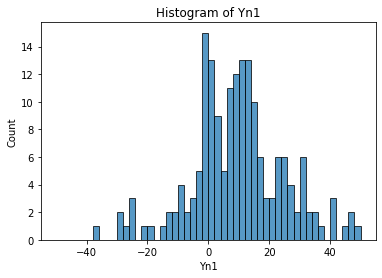

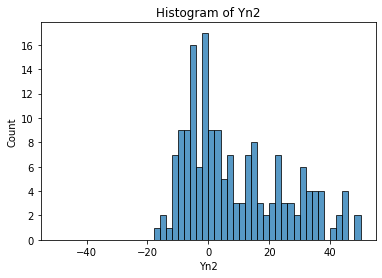

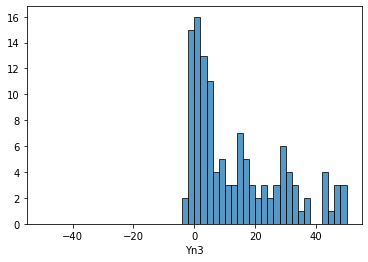

In [7]:
# Plot histogram of Yn1
plt.hist(Y_n1, bins=50, range = (-50,50), edgecolor='black', alpha=0.75)
plt.xlabel('Yn1')
plt.ylabel('Count')
plt.title('Histogram of Yn1')
plt.show()

# Plot histogram of Yn2
plt.hist(Y_n2, bins=50,range = (-50,50), edgecolor='black', alpha=0.75)
plt.xlabel('Yn2')
plt.ylabel('Count')
plt.title('Histogram of Yn2')
plt.show()

# Plot histogram of Yn3
plt.hist(Y_n3, bins=50,range = (-50,50), edgecolor='black', alpha=0.75)
plt.xlabel('Yn3')
plt.show()

#Simulate M

\begin{align*}
            &M_{n1}=\mathbf{1}\Big \{\sum_{p=1}^{5} \exp(X_{np})+\sum_{p=1}^{5}\sum_{p^{\prime}=1}^{5}X_{np} X_{np^{\prime}}^{2}+\sin^{3}(U_{n1})+U_{n2} + \exp(Y_{n1})> \lambda_{1} \} \\
            &M_{n2}=\mathbf{1}\Big \{\sum_{p=1}^{5} X_{np}^{3}+\sum_{p=1}^{5}\sum_{p^{\prime}=1}^{5}X_{np}X_{np^{\prime}}+U_{n1}+ \frac{1}{2}\cdot Y_{n1}^{3}+Y_{n2}>\lambda_{2} \} \\
            &  M_{n3}=\mathbf{1}\Big \{\sum_{p=1}^{5}p\cdot X_{np}+\sum_{p=1}^{5}\sum_{p^{\prime}=1}^{5}\sum_{p^{\prime\prime}=1}^{5}X_{np} X_{np^{\prime}}X_{np^{\prime\prime}}+\sin(U_{n1})\cdot U_{n2} + Y_{n1} + \exp(Y_{n2}) > \lambda_{3} \}. 
\end{align*}






In [8]:

def missing_dataset_indicator(X, U, Y, lambda1, lambda2, lambda3, single = True):
    n = X.shape[0]
    M = np.zeros((n, 3))
    M_lamda = np.zeros((n, 3))

    for i in range(n):
        sum1 = 0
        for p in range(1,6):
          for p_2 in range(1,6):
            sum1 += X[i,p-1] * np.power(X[i,p_2-1],2)
          
        sum2 = 0
        for p in range(1,6):
          for p_2 in range(1,6):
            sum2 += X[i,p-1] * X[i,p_2-1]

        sum3 = 0
        for p in range(1,6):
            sum3 += p * X[i,p-1] 

        sum4 = 0
        for p in range(1,6):
          for p_2 in range(1,6):
            for p_3 in range(1,6):
              sum4 += X[i,p-1] * X[i,p_2-1] * X[i,p_3-1]

        M_lamda[i][0] = np.exp(X[i, :]).sum() + sum1 + np.sin(U[i, 0])**3 + U[i, 1] + np.exp(Y[i, 0])

        M_lamda[i][1] = ((X[i, :]**3).sum() + sum2 + U[i, 0] + (Y[i, 0]**3)/2 + Y[i, 1])

        M_lamda[i][2] = (sum3 + sum4 + np.sin(U[i, 0]) * U[i, 1] + Y[i, 0] + np.exp(Y[i, 1]))

        if (np.exp(X[i, :]).sum() + sum1 + np.sin(U[i, 0])**3 + U[i, 1] + np.exp(Y[i, 0])) > lambda1:
          M[i][0] = 1 - single
        else:
          M[i][0] = 0
        
        if ((X[i, :]**3).sum() + sum2 + U[i, 0] + (Y[i, 0]**3)/2 + Y[i, 1]) > lambda2:
          M[i][1] =  1 - single
        else:
          M[i][1] =  0

        if (sum3 + sum4 + np.sin(U[i, 0]) * U[i, 1] + Y[i, 0] + np.exp(Y[i, 1])) > lambda3:
          M[i][2] =  0
        else:
          M[i][2] =  1

    return M,M_lamda
M,M_lamda = missing_dataset_indicator(X,U,Y,lambda1,lambda2,lambda3)
display(pd.DataFrame(M))
print(M_lamda)


,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
195,0.0,0.0,0.0
196,0.0,0.0,0.0
197,0.0,0.0,1.0
198,0.0,0.0,0.0


[[ 1.05637796e+001  3.79828764e-001  4.42267077e+000]
 [-1.09109718e+001 -2.50055084e+002 -5.21513537e+001]
 [ 4.84235516e+010  7.46948698e+003  5.99210220e+006]
 [ 2.93275238e+000 -8.32225669e+000 -3.91780225e+000]
 [-1.80580219e+001 -1.67923246e+003 -5.21644275e+001]
 [ 6.30572609e+003  3.69602246e+002  5.46253698e+010]
 [-2.38137385e+001 -1.01444173e+004 -8.41379061e+001]
 [ 3.52175017e+001  2.61433878e+001  9.61316947e+002]
 [ 1.62862520e+005  8.71350060e+002  1.96675086e+002]
 [-4.00429604e+001 -2.54693870e+004 -1.76385706e+002]
 [ 1.86529819e+013  1.43085814e+004  2.10583353e+013]
 [ 1.18648551e+013  1.36912141e+004  3.35082003e+015]
 [ 1.21734814e+011  8.34085745e+003  6.90471449e+008]
 [ 1.07803414e+003  1.68284233e+002 -9.29009928e-002]
 [ 1.99529814e+004  4.86473359e+002  1.24691464e+001]
 [ 1.23107867e+005  8.51208630e+002  1.62892977e+014]
 [-1.75220829e+001 -1.24718935e+003 -3.75160982e+001]
 [ 5.86531441e+000 -2.59855446e+000  1.60759788e+000]
 [ 5.95369891e+000 -1.692036

[ 1.05637796e+01 -1.09109718e+01  4.84235516e+10  2.93275238e+00
 -1.80580219e+01  6.30572609e+03 -2.38137385e+01  3.52175017e+01
  1.62862520e+05 -4.00429604e+01  1.86529819e+13  1.18648551e+13
  1.21734814e+11  1.07803414e+03  1.99529814e+04  1.23107867e+05
 -1.75220829e+01  5.86531441e+00  5.95369891e+00 -3.45300424e+02
 -2.89424533e+01  7.73900838e+09  2.14461457e+10  8.22025526e+04
  2.36116052e+01  5.45038290e+13  1.35149200e+51  4.33023640e+03
  2.25489639e+04 -1.85452212e+01  1.63056480e+11  1.93412427e+00
  3.27136855e+17 -6.26511460e+00  2.00731178e+15  1.94515503e+00
  9.99356660e+07  1.50514651e+03  2.04781612e+01  6.69587707e+05
  7.99415580e+11  4.87763591e+00  1.62628955e+06  9.62853811e+08
 -6.68932356e+01  6.07974456e+09  4.74204442e+06 -1.85954984e+01
  1.18244118e+07  5.44866977e+09  7.73029485e+55 -3.35319575e+00
  2.18230006e+08 -2.52711351e+00  1.71031481e+10  1.07403396e+07
  5.71243427e+04  3.11088374e+04  1.14255286e+09  3.43401076e+00
  9.79950571e+30  2.03521

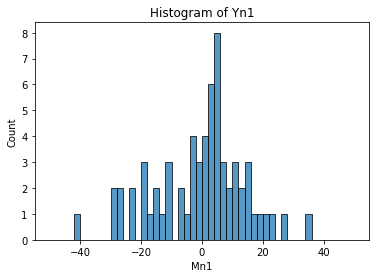

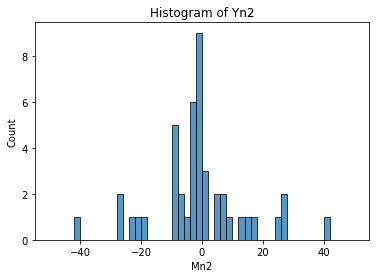

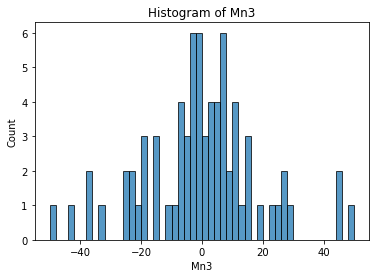

In [9]:
# Plot histogram of Mn1
print(M_lamda[:,0])
print(M_lamda[0,:])

plt.hist(M_lamda[:,0], bins=50, range = (-50,50), edgecolor='black', alpha=0.75)
plt.xlabel('Mn1')
plt.ylabel('Count')
plt.title('Histogram of Yn1')
plt.show()

# Plot histogram of Mn2
plt.hist(M_lamda[:,1], bins=50, range = (-50,50), edgecolor='black', alpha=0.75)
plt.xlabel('Mn2')
plt.ylabel('Count')
plt.title('Histogram of Yn2')
plt.show()

# Plot histogram of Mn3
plt.hist(M_lamda[:,2], bins=50, range = (-50,50), edgecolor='black', alpha=0.75)
plt.xlabel('Mn3')
plt.ylabel('Count')
plt.title('Histogram of Mn3')
plt.show()

In [10]:
print(M[:,0].sum() / N)

print(M[:,1].sum() / N)

print(M[:,2].sum() / N)

0.0
0.0
0.365


# Save all the simulated data


In [11]:
# Read the data,it is important to put the "Research" directory in ones own google drive
Z = Z.reshape((-1,1))

np.save("/Users/jiaweizhang/research/data/X.npy", X)
np.save("/Users/jiaweizhang/research/data/Y.npy", Y)
np.save("/Users/jiaweizhang/research/data/Z.npy", Z)
np.save("/Users/jiaweizhang/research/data/U.npy", U)
np.save("/Users/jiaweizhang/research/data/M.npy", M)

print(X.shape)
display(pd.DataFrame(X))
print(pd.DataFrame(X).describe())
print(Y.shape)
display(pd.DataFrame(Y))
print(pd.DataFrame(Y).describe())
print(Z.shape)
display(pd.DataFrame(Z))
print(pd.DataFrame(Z).describe())
print(U.shape)
display(pd.DataFrame(U))
print(pd.DataFrame(U).describe())
print(M.shape)
display(pd.DataFrame(M))
print(pd.DataFrame(M).describe())


print("Sucessfully Saved")

(200, 5)


,0,1,2,3,4
0,-0.435531,-0.869668,0.270965,0.925141,0.0
1,0.187546,-0.615821,-1.809188,-0.995245,0.0
2,-0.038019,-0.242084,0.263160,1.731961,0.0
3,-1.653532,-1.355686,-0.119187,0.187381,1.0
4,0.606053,0.388477,-2.023278,-1.926758,0.0
...,...,...,...,...,...
195,1.667882,-0.790816,-0.604503,-0.658843,1.0
196,2.101146,1.318587,-0.162263,0.640948,0.0
197,-0.450553,-2.035282,-0.458638,0.502824,0.0
198,0.692014,-1.435076,0.814194,1.692886,1.0


                0           1           2           3           4
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     0.510114   -0.283570   -0.068952    0.478634    0.340000
std      1.008329    1.052300    1.034360    1.026695    0.474898
min     -2.442104   -2.824259   -3.321024   -3.985748    0.000000
25%     -0.076194   -1.056790   -0.603729   -0.074655    0.000000
50%      0.509966   -0.331465   -0.032915    0.523522    0.000000
75%      1.114712    0.453386    0.448076    1.057785    1.000000
max      3.462407    2.835587    3.477644    3.591964    1.000000
(200, 3)


,0,1,2
0,1.315854,-1.389966,-1.551847
1,-7.916944,-6.616201,35.372045
2,24.603252,15.605947,28.000255
3,2.020324,-10.560452,17.859683
4,-14.941313,-6.780746,43.324673
...,...,...,...
195,18.485554,10.271840,5.669306
196,48.149549,63.950933,240.072178
197,-1.335369,-6.716707,23.357318
198,45.033548,36.301783,94.464746


                0           1            2
count  200.000000  200.000000   200.000000
mean    15.784879   26.191189   132.367068
std     41.480618   50.312154   316.106495
min   -342.634076  -16.506796    -2.123399
25%      0.849022   -2.554598     4.704707
50%     10.826103    9.181227    28.576952
75%     24.432390   32.582196    94.902723
max    207.160864  284.061537  2447.669581
(200, 1)


,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
195,1.0
196,1.0
197,1.0
198,1.0


                0
count  200.000000
mean     0.500000
std      0.501255
min      0.000000
25%      0.000000
50%      0.500000
75%      1.000000
max      1.000000
(200, 2)


,0,1
0,0.547365,1.0
1,1.354381,0.0
2,-0.680057,1.0
3,0.355176,1.0
4,1.738198,1.0
...,...,...
195,-0.791787,1.0
196,-0.536079,1.0
197,1.902017,1.0
198,0.312134,1.0


                0          1
count  200.000000  200.00000
mean     0.460923    0.67500
std      0.989697    0.46955
min     -2.051622    0.00000
25%     -0.247252    0.00000
50%      0.411356    1.00000
75%      1.142380    1.00000
max      2.914024    1.00000
(200, 3)


,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
195,0.0,0.0,0.0
196,0.0,0.0,0.0
197,0.0,0.0,1.0
198,0.0,0.0,0.0


           0      1           2
count  200.0  200.0  200.000000
mean     0.0    0.0    0.365000
std      0.0    0.0    0.482638
min      0.0    0.0    0.000000
25%      0.0    0.0    0.000000
50%      0.0    0.0    0.000000
75%      0.0    0.0    1.000000
max      0.0    0.0    1.000000
Sucessfully Saved
